# Graphviz plot of proposed thrombolysis decision-making model

## Set up graph

In [1]:
try:
    from graphviz import Digraph
except:
    !pip install graphviz
    from graphviz import Digraph



def set_up_graph():

    # Create a directed graph
    g = Digraph(strict=True)

    # Set graph attributes (allow it to go large scale, and set a minimum spacing)
    g.attr(overlap='scale')
    g.attr(sep='0.3')

    # Use custom layout engine if desired (see https://graphviz.org/docs/layouts/)
    #g.attr(layout='neato')

    # Set node attributes
    g.attr('node', shape='circle', fixedsize='true', width='1.3', height='1.2',ordering="out")

    return g


# Notebook (used for file save)
notebook = '01_thrombolysis_decision'

## Set up nodes

In [2]:
# Use a function to create common nodels between two graphs
def create_common_nodes():
    g.node('thrombolysis', label='Thrombolysis\nY/N', penwidth='2', fontname='times bold')
    g.node('hospital', label='Hospital\nattended')
    g.node('nihss', label='Stroke\nseverity')
    g.node('scan', label='Arrival\nto scan\ntime')
    g.node('precise', label='Precise\nonset\ntime?')
    g.node('mrs', label='Prior\ndisability')
    g.node('af', label='Use of AF\nanticoagulants')
    g.node('age', label='Age')
    g.node('sleep', label='Onset\nduring\nsleep')

## Model diagram

In [3]:
# Set up graph and common nodes
g = set_up_graph()
create_common_nodes()

# Define edges
g.edge('nihss', 'thrombolysis')
g.edge('mrs', 'thrombolysis')
g.edge('precise', 'thrombolysis')
g.edge('scan', 'thrombolysis')
g.edge('af', 'thrombolysis')
g.edge('age', 'thrombolysis')
g.edge('sleep', 'thrombolysis')
g.edge('hospital', 'thrombolysis')

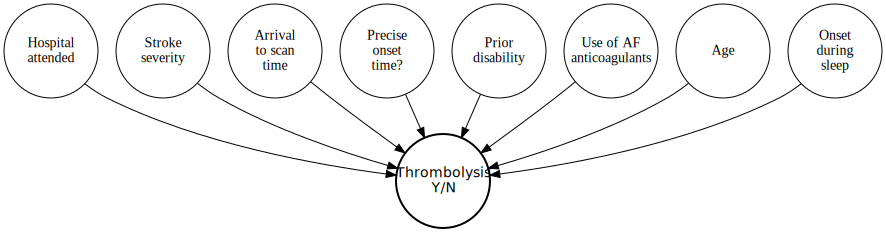

In [4]:
g

## 

In [5]:
# Save the graph as a PNG file
filename = f'./output/{notebook}_model'
g.format = 'png'
g.render(filename, cleanup=True)

'output/01_thrombolysis_decision_model.png'

## Causal diagram

In [6]:
# Clear graph and regenerate common nodes
g.clear()
g = set_up_graph()
create_common_nodes()

# Add new node for overal patient suitability
g.node('patient', label='Thrombolysis\nsuitability\n(0-1)')

g.edge('nihss', 'patient')
g.edge('mrs', 'patient')
g.edge('precise', 'patient')
g.edge('scan', 'patient')
g.edge('af', 'patient')
g.edge('age', 'patient')
g.edge('sleep', 'patient')
g.edge('patient', 'hospital')
g.edge('hospital', 'thrombolysis')

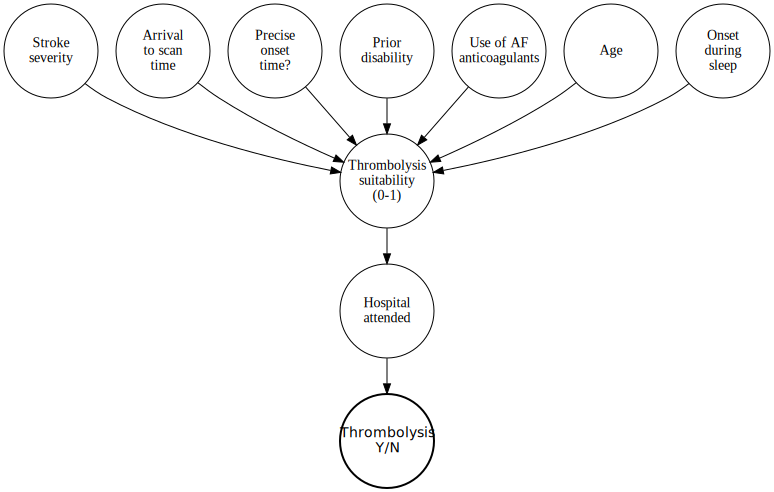

In [7]:
g

In [8]:
# Save the graph as a PNG file
filename = f'./output/{notebook}_causal'
g.format = 'png'
g.render(filename, cleanup=True)

'output/01_thrombolysis_decision_causal.png'